In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Question 1.1

In [175]:
def construct(AV, IV, duration, N):
    """ Construct matrix TC """
    
    tc = np.array([])
    iv_count = IV
    
    # onsets arrival vector
    tc = np.zeros(AV)
    
    while len(tc) < N:
        
        # duration of ones
        
        for i in range(duration):
            if len(tc) >= N:
                break
            tc = np.append(tc, 1)

        # increment vector
        while (len(tc) < iv_count) & (len(tc) < N):
            tc = np.append(tc, 0)
        iv_count += IV
        
        # onsets arrival vector
        for i in range(AV):
            if len(tc) >= N:
                break
            tc = np.append(tc, 0)
        
    # Standardise
    tc = tc - np.mean(tc)
    tc = tc / np.std(tc)
    
    return tc

In [176]:
#(AV) = [0,20,0,0,0,0], (IV) = [30,45,60,40,40,40], duration of ones = [15,20,25,15,20,25].
tc1 = construct(0, 30, 15, 240)
tc2 = construct(20, 45, 20, 240)
tc3 = construct(0, 60, 25, 240)
tc4 = construct(0, 40, 15, 240)
tc5 = construct(0, 40, 20, 240)
tc6 = construct(0, 40, 25, 240)
TC = [tc1, tc2, tc3, tc4, tc5, tc6]

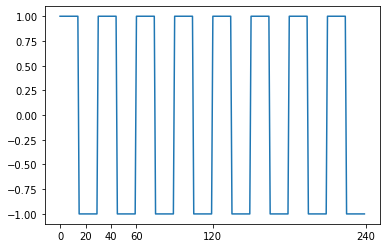

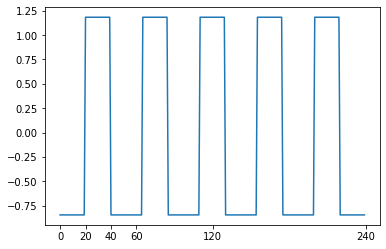

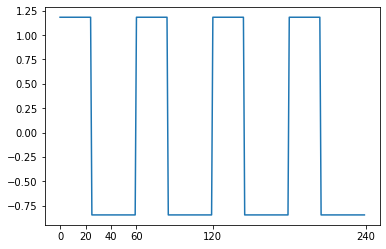

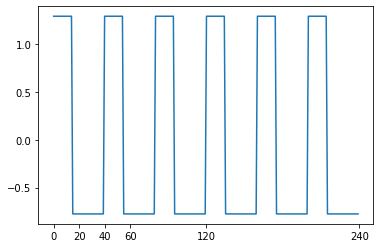

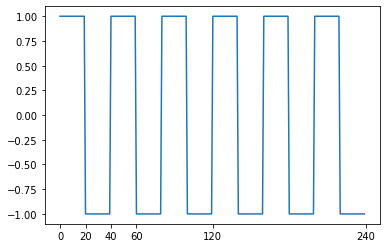

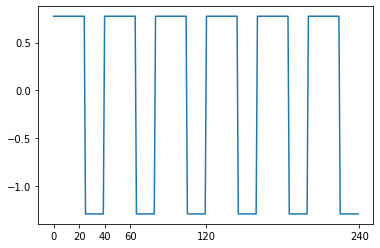

In [177]:
for tc in TC:
    plt.plot(tc)
    plt.xticks([0, 20, 40, 60, 120, 240])
    plt.show()

### Question 1.2

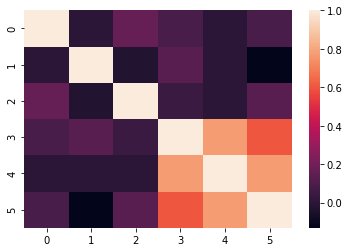

In [214]:
import seaborn as sns
df = pd.DataFrame(TC)
tc_df = df.T
ax = sns.heatmap(tc_df.corr())

### Question 1.3

In [211]:
def one_slice(a, b, c, d):
    
    tmp_sm = np.zeros(441).reshape((21,21))
    
    for row in range(a-1, b):
        for col in range(c-1, d):
            tmp_sm[row][col] = 1.0
            
    return tmp_sm

In [218]:
#i) 02:06,02:06, ii) 02:06,15:19, iii) 08:13,02:06, iv) 08:13,15:19, v) 15:19,02:06, vi) 15:19,15:19
tmp1 = one_slice(2, 6, 2, 6)
tmp2 = one_slice(2, 6, 15, 19)
tmp3 = one_slice(8, 13, 2, 6)
tmp4 = one_slice(8, 13, 15, 19)
tmp5 = one_slice(15, 19, 2, 6)
tmp6 = one_slice(15, 19, 15, 19)

tmpSM = np.array([tmp1, tmp2, tmp3, tmp4, tmp5, tmp6])

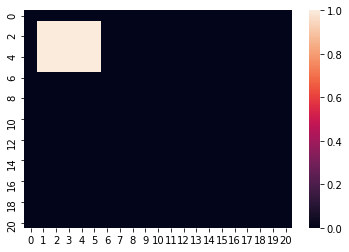

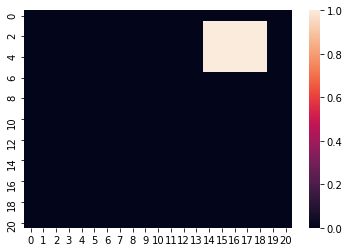

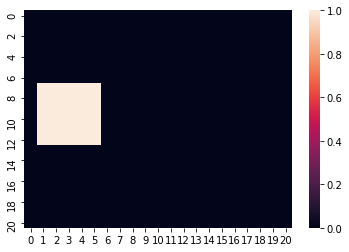

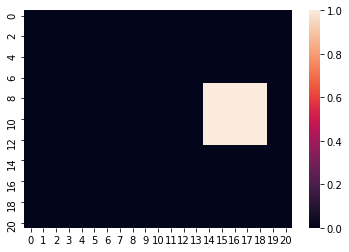

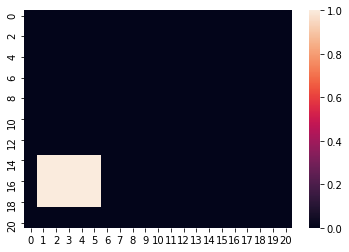

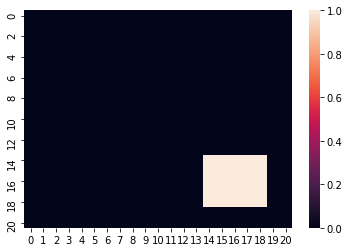

In [222]:
for tmp in tmpSM:
    tmp_df = pd.DataFrame(tmp)
    ax = sns.heatmap(tmp_df)
    plt.show()

In [224]:
SM = tmpSM.reshape((6, 441))

<AxesSubplot:>

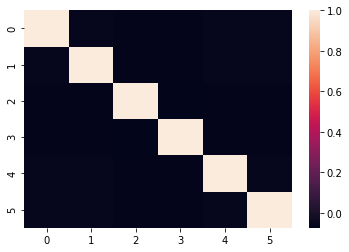

In [229]:
sm_df = pd.DataFrame(SM)
sm_df = sm_df.T
sns.heatmap(sm_df.corr())

### Question 1.4

In [254]:
from random import gauss
import math

temp_noise = np.array([gauss(0.0, math.sqrt(0.25)) for i in range(1440)])
temp_noise = temp_noise.reshape((240,6))

spatial_noise = np.array([gauss(0.0, math.sqrt(0.015)) for i in range(2646)])
spatial_noise = spatial_noise.reshape((6,441))

<AxesSubplot:>

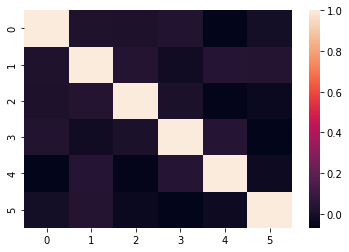

In [255]:
snoise_df = pd.DataFrame(spatial_noise)
snoise_df = snoise_df.T
sns.heatmap(snoise_df.corr())

<AxesSubplot:>

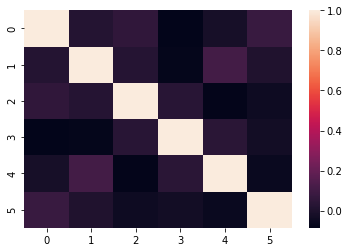

In [257]:
tnoise_df = pd.DataFrame(temp_noise)
sns.heatmap(tnoise_df.corr())

<AxesSubplot:ylabel='Count'>

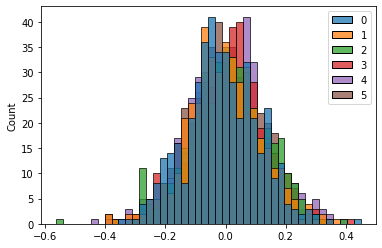

In [265]:
sns.histplot(data=snoise_df)

<AxesSubplot:ylabel='Count'>

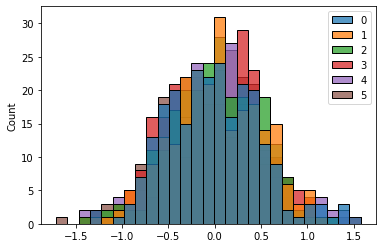

In [259]:
sns.histplot(data=tnoise_df)

In [274]:
TtTs = np.dot(temp_noise, spatial_noise)

<AxesSubplot:>

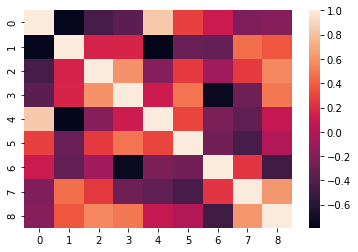

In [285]:
ttts_df = pd.DataFrame(TtTs)
mini_df = ttts_df[[0, 1, 2, 3, 4, 5, 6, 7, 8]]
sns.heatmap(mini_df.corr())